# Step1: Import necessary libraries for training, preprocessing, exploratory analysis, metrics ...

In [209]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from warnings import filterwarnings
filterwarnings('ignore')

In [210]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.autoscale()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Step2: Import data into dataframe

In [211]:
train_features = pd.read_csv("./train/X_train.txt",header=None, delimiter=r"\s+")
test_features  = pd.read_csv("./test/X_test.txt",header=None, delimiter=r"\s+")

In [212]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [213]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


# Data pre-processing

<b>Check if any duplicate rows are available </b>

In [214]:
train_features[train_features.duplicated()].count().sum()

0

<b>Check if any null values are present and impute them with column mean (if the count is insignificant)  </b>

In [215]:
Imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [216]:
train_features = Imputer.fit_transform(train_features.values)
train_features = pd.DataFrame(train_features)

In [217]:
train_features.isnull().sum().sum()

0

<b>Transform features by scaling each feature between [-1 1]</b>

In [218]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [219]:
train_features = pd.DataFrame(scaler.fit_transform(train_features.values))

In [220]:
train_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.489659,-0.604754,-0.630512,-0.519133,-0.606150,-0.468604,...,0.156104,-0.306414,-0.617225,-0.003062,0.002186,0.009381,-0.004028,-0.489547,0.432314,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.524651,0.418687,0.424073,0.493927,0.414122,0.544547,...,0.257866,0.323454,0.314405,0.340777,0.448306,0.608698,0.478914,0.511807,0.402501,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.977304,-0.980233,-0.993591,-0.977803,-0.980251,-0.936219,...,0.003039,-0.543799,-0.842389,-0.134816,-0.289549,-0.481937,-0.375116,-0.812065,0.328838,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.845545,-0.859365,-0.950709,-0.854984,-0.857143,-0.881637,...,0.165048,-0.343369,-0.705539,-0.002227,0.008943,0.009390,0.001596,-0.709417,0.599385,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,0.007919,-0.262415,-0.292680,-0.051363,-0.265671,-0.017129,...,0.324391,-0.125013,-0.493116,0.140804,0.292861,0.507165,0.362039,-0.509079,0.689066,0.107659
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


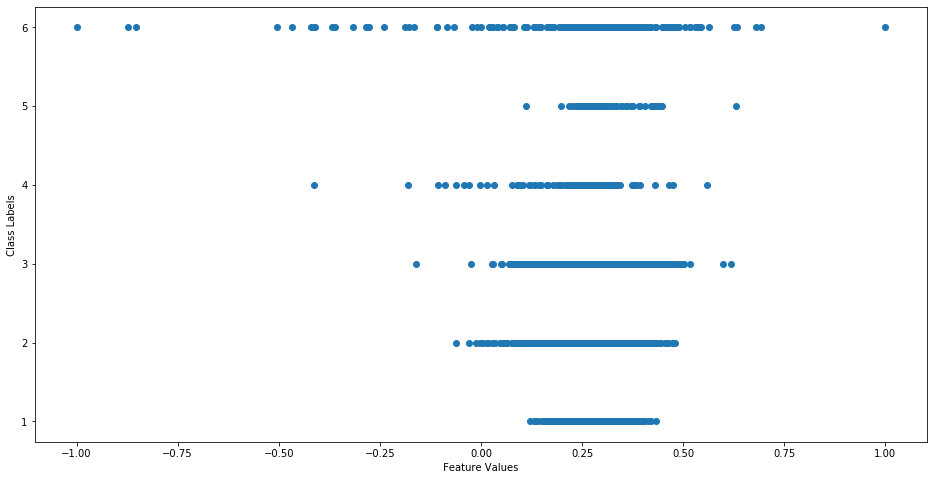

In [223]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_features[0],train_labels)
plt.xlabel(" Feature Values ")
plt.ylabel(" Class Labels ")
plt.show()

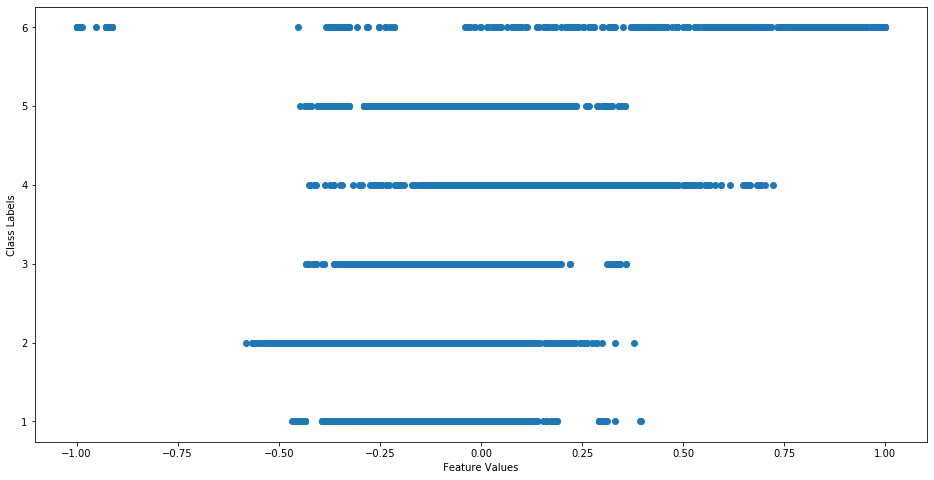

In [224]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_features[51],train_labels)
plt.xlabel(" Feature Values ")
plt.ylabel(" Class Labels ")
plt.show()

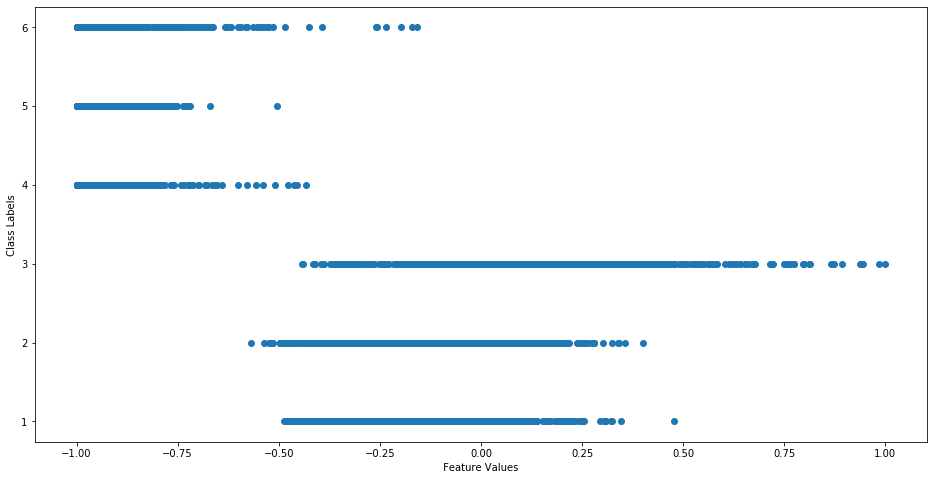

In [227]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_features[280],train_labels)
plt.xlabel(" Feature Values ")
plt.ylabel(" Class Labels ")
plt.show()

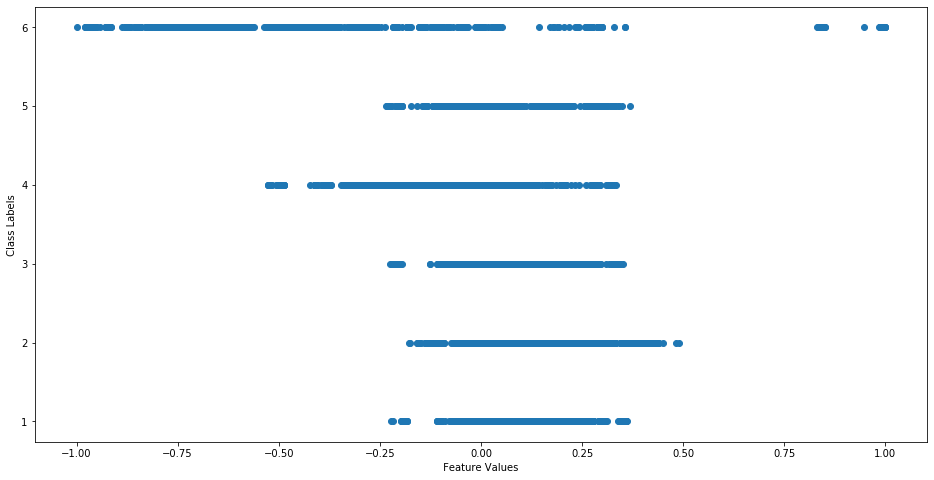

In [228]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_features[560],train_labels)
plt.xlabel(" Feature Values ")
plt.ylabel(" Class Labels ")
plt.show()

<b>Remove outliers using zscore, before removing check how many to delete</b>

In [243]:
prev_rows = len(train_features)
data_copy = train_features.copy()
z_score = np.abs(stats.zscore(train_features))

In [244]:
data_copy = data_copy[(z_score < 10).all(axis=1)]
print("Before removing outliers , rows - ", prev_rows)
print("After removing outliers , rows -", len(data_copy))
print("Number of records deleted - ", (prev_rows - len(data_copy)))

Before removing outliers , rows -  7352
After removing outliers , rows - 7152
Number of records deleted -  200


<b> Repeat same preprocessing steps for test_features as well </b>

In [245]:
test_features = Imputer.fit_transform(test_features.values)
test_features = pd.DataFrame(test_features)
# Gives a final sum across dataframe
test_features.isnull().sum().sum()


0

In [246]:
scaler = MinMaxScaler(feature_range=(-1,1))
test_features = pd.DataFrame(scaler.fit_transform(test_features.values))
test_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.370371,0.133092,-0.125855,-0.473042,-0.508330,-0.509414,-0.502264,-0.522741,-0.492787,-0.436053,...,0.025771,-0.277593,-0.598756,0.005818,0.007402,0.039500,-0.021847,-0.482471,0.033169,-0.063113
std,0.095848,0.084551,0.079879,0.563309,0.494269,0.487283,0.535343,0.479919,0.501457,0.602620,...,0.258765,0.317245,0.311042,0.336333,0.449630,0.635339,0.503553,0.560374,0.338924,0.251222
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.351507,0.109783,-0.149729,-0.988132,-0.973664,-0.969325,-0.990155,-0.974216,-0.966995,-0.979399,...,-0.129554,-0.517494,-0.829593,-0.130062,-0.281927,-0.519762,-0.434763,-0.830004,-0.021956,-0.114888
50%,0.375303,0.136037,-0.125990,-0.906625,-0.790972,-0.769698,-0.914177,-0.799985,-0.745042,-0.885325,...,0.039704,-0.311023,-0.683672,0.005742,0.010400,0.046588,-0.031318,-0.719874,0.144656,-0.023527
75%,0.392684,0.158448,-0.104808,-0.000330,-0.105919,-0.076318,-0.058147,-0.133537,-0.052283,0.083961,...,0.202842,-0.083559,-0.458332,0.146832,0.294624,0.621943,0.391679,-0.517705,0.226893,0.083680
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [248]:
train_labels=pd.read_csv("./train/y_train.txt",header=None)
train_labels.columns=['label']
test_labels=pd.read_csv("./test/y_test.txt",header=None)
test_labels.columns=['label']

In [249]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
label    7352 non-null int64
dtypes: int64(1)
memory usage: 57.6 KB


In [250]:
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
label    2947 non-null int64
dtypes: int64(1)
memory usage: 23.1 KB


In [251]:
train_labels.describe()

,label
count,7352.000000
mean,3.643362
std,1.744802
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [252]:
test_labels.describe()

,label
count,2947.000000
mean,3.577876
std,1.740348
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [253]:
activities=['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

In [254]:
train_labels_copy = train_labels.copy()
train_labels_copy['label'] = train_labels_copy['label'].apply(lambda x: activities[x - 1])
test_labels_copy = test_labels.copy()
test_labels_copy['label'] = test_labels_copy['label'].apply(lambda x: activities[x - 1])

In [255]:
train_labels_copy['label'].value_counts()


LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: label, dtype: int64

In [256]:
test_labels_copy['label'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: label, dtype: int64

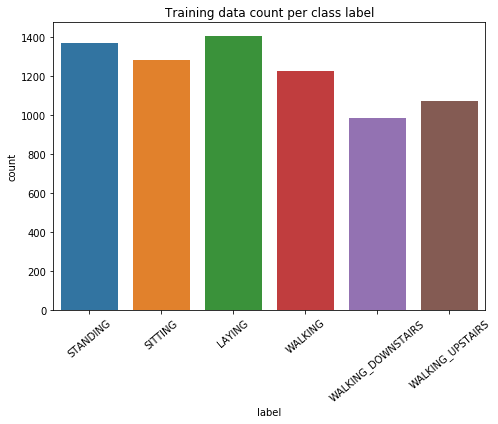

In [257]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
axis = sns.countplot(x='label',data=train_labels_copy,)
axis.set_xticklabels(axis.get_xticklabels(), rotation=40)
plt.title("Training data count per class label")
plt.show()

# Training models

# 1. Logistic Regression

In [95]:
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=0)


In [70]:
lr_params = {'C':np.logspace(-1, 1, 10),
             'max_iter':[10,100]}
lr = LogisticRegression(solver='lbfgs')
gridcv_lr = GridSearchCV(lr, lr_params, verbose=1, cv=3)

In [71]:

gridcv_lr.fit(train_features,train_labels['label'].ravel())


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   36.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ]),
                         'max_iter': [10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [72]:
gridcv_lr.best_params_

{'C': 1.291549665014884, 'max_iter': 100}

In [73]:
lr_predictions = gridcv_lr.predict(test_features)

In [74]:
print(classification_report(test_labels,lr_predictions))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       496
           2       0.97      0.98      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.88      0.92       491
           5       0.91      0.97      0.94       532
           6       0.99      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



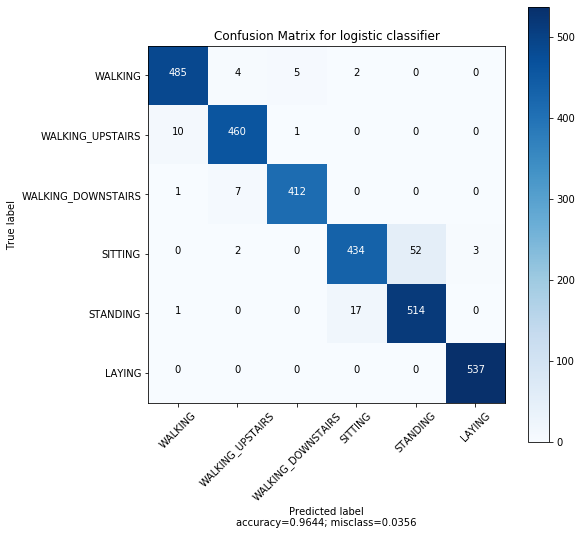

In [75]:
plot_confusion_matrix(confusion_matrix(test_labels,lr_predictions),
                      normalize    = False,
                      target_names = activities,
                      title        = "Confusion Matrix for logistic classifier")

# 2. KNN

In [258]:
knn_params = {'n_neighbors':np.array(range(9,18))}
knn = KNeighborsClassifier()
gridcv_knn = GridSearchCV(knn, knn_params, verbose=False, cv=3)

In [259]:

gridcv_knn.fit(train_features,train_labels['label'].ravel())



KeyboardInterrupt: 

In [217]:
gridcv_knn.best_params_

{'n_neighbors': 17}

In [218]:
knn_predictions = gridcv_knn.predict(test_features)

In [220]:
print(classification_report(test_labels,knn_predictions))

              precision    recall  f1-score   support

           1       0.85      0.98      0.91       496
           2       0.89      0.91      0.90       471
           3       0.96      0.77      0.85       420
           4       0.93      0.80      0.86       491
           5       0.84      0.94      0.89       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.91      0.90      2947



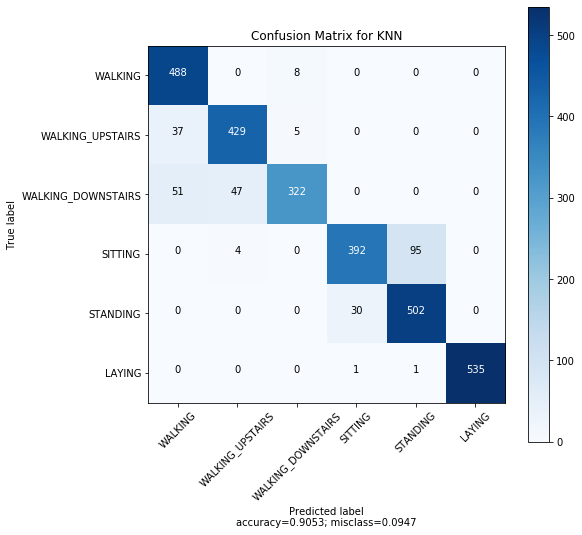

In [221]:
plot_confusion_matrix(confusion_matrix(test_labels,knn_predictions),
                      normalize    = False,
                      target_names = activities,
                      title        = "Confusion Matrix for KNN")

# 3.Random Forest

In [89]:
rf_params = {'n_estimators' : np.arange(10,30,10),'max_depth' : np.arange(1,6,2)}
rf = RandomForestClassifier(random_state=0)
gridcv_rf = GridSearchCV(rf, rf_params, verbose=False, cv=3)


In [90]:
gridcv_rf.fit(train_features,train_labels['label'].ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [91]:
gridcv_rf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [92]:
rf_predictions = gridcv_rf.predict(test_features)

In [93]:
print(classification_report(test_labels,rf_predictions))

              precision    recall  f1-score   support

           1       0.80      0.96      0.88       496
           2       0.90      0.89      0.90       471
           3       0.93      0.73      0.82       420
           4       0.93      0.79      0.85       491
           5       0.83      0.94      0.88       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



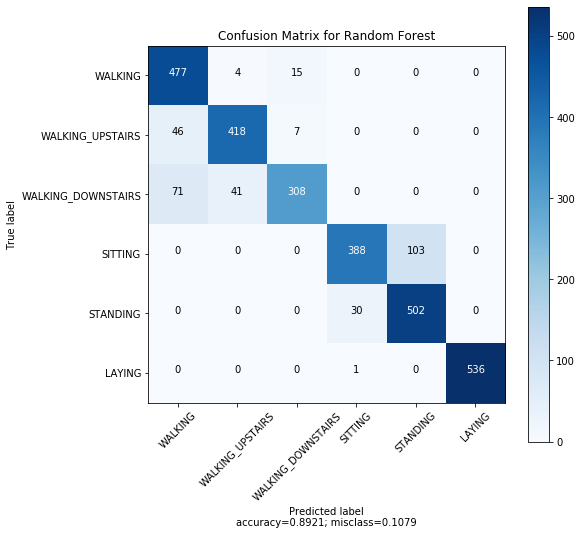

In [127]:
plot_confusion_matrix(confusion_matrix(test_labels,rf_predictions),
                      normalize    = False,
                      target_names = activities,
                      title        = "Confusion Matrix for Random Forest")

# selecting important features using random forest model

In [260]:
new_rf = RandomForestClassifier(random_state=0,max_depth=5,n_estimators=20)

In [261]:
new_rf.fit(train_features,train_labels['label'].ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [262]:
newrf_predictions = new_rf.predict(test_features)

In [263]:
print(classification_report(test_labels,newrf_predictions))

              precision    recall  f1-score   support

           1       0.98      0.60      0.75       496
           2       0.89      0.68      0.77       471
           3       0.54      0.93      0.68       420
           4       0.68      0.89      0.77       491
           5       0.86      0.61      0.71       532
           6       1.00      1.00      1.00       537

    accuracy                           0.78      2947
   macro avg       0.83      0.79      0.78      2947
weighted avg       0.84      0.78      0.79      2947



In [265]:
imp_features= new_rf.feature_importances_

In [266]:
remove_col = []
for i in range(len(imp_features)):
    if imp_features[i] == 0:
        remove_col.append(i)

In [268]:
train_copy = train_features.copy()

In [269]:

train_copy = train_copy.drop(remove_col,axis=1)

In [270]:
train_copy.describe()

,3,6,7,9,10,13,15,16,17,18,...,537,538,541,549,552,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.605438,-0.630512,-0.519133,-0.468604,-0.306043,0.387386,-0.547569,-0.820041,-0.901875,-0.845784,...,-0.889442,-0.047826,-0.779379,-0.284627,-0.306414,0.009381,-0.004028,-0.489547,0.432314,-0.056515
std,0.448734,0.424073,0.493927,0.544547,0.282243,0.343611,0.471808,0.259607,0.126333,0.221983,...,0.157653,0.283018,0.275734,0.630896,0.323454,0.608698,0.478914,0.511807,0.402501,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.992754,-0.993591,-0.977803,-0.936219,-0.563561,0.101829,-0.982992,-0.999936,-0.999787,-0.999460,...,-1.000000,-0.242435,-0.993104,-0.955696,-0.543799,-0.481937,-0.375116,-0.812065,0.328838,-0.143414
50%,-0.946196,-0.950709,-0.854984,-0.881637,-0.479677,0.627737,-0.885461,-0.998046,-0.994066,-0.985546,...,-0.948718,-0.062925,-0.952402,-0.455569,-0.343369,0.009390,0.001596,-0.709417,0.599385,0.003181
75%,-0.242813,-0.292680,-0.051363,-0.017129,-0.065364,0.685622,-0.107428,-0.710707,-0.816705,-0.748018,...,-0.846154,0.147729,-0.611955,0.336785,-0.125013,0.507165,0.362039,-0.509079,0.689066,0.107659
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 228 entries, 3 to 560
dtypes: float64(228)
memory usage: 12.8 MB


In [271]:
test_copy = test_features.copy()

In [272]:
test_copy = test_copy.drop(remove_col,axis=1)

In [273]:
test_copy.describe()

,3,6,7,9,10,13,15,16,17,18,...,537,538,541,549,552,556,557,558,559,560
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,-0.473042,-0.502264,-0.522741,-0.436053,-0.554190,0.606240,-0.412969,-0.700354,-0.751439,-0.750375,...,-0.788876,-0.018289,-0.644641,-0.182594,-0.277593,0.039500,-0.021847,-0.482471,0.033169,-0.063113
std,0.563309,0.535343,0.479919,0.602620,0.435663,0.411285,0.585035,0.394435,0.326599,0.318428,...,0.293419,0.276478,0.398951,0.660144,0.317245,0.635339,0.503553,0.560374,0.338924,0.251222
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.988132,-0.990155,-0.974216,-0.979399,-0.962567,0.294418,-0.972187,-0.999834,-0.999272,-0.998557,...,-1.000000,-0.212364,-0.982707,-0.886687,-0.517494,-0.519762,-0.434763,-0.830004,-0.021956,-0.114888
50%,-0.906625,-0.914177,-0.799985,-0.885325,-0.766394,0.857377,-0.815416,-0.993660,-0.971139,-0.958123,...,-0.909091,-0.018432,-0.864304,-0.228010,-0.311023,0.046588,-0.031318,-0.719874,0.144656,-0.023527
75%,-0.000330,-0.058147,-0.133537,0.083961,-0.191786,0.969331,0.138286,-0.493403,-0.588868,-0.557318,...,-0.727273,0.172901,-0.374215,0.456840,-0.083559,0.621943,0.391679,-0.517705,0.226893,0.083680
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [274]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 228 entries, 3 to 560
dtypes: float64(228)
memory usage: 5.1 MB


In [275]:
new_knn = KNeighborsClassifier(n_neighbors=17)
new_knn.fit(train_copy,train_labels['label'].ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [276]:
new_knn_predictions = new_knn.predict(test_copy)
print(classification_report(test_labels,new_knn_predictions))

              precision    recall  f1-score   support

           1       0.98      0.79      0.87       496
           2       0.98      0.84      0.90       471
           3       0.70      0.97      0.81       420
           4       0.85      0.95      0.90       491
           5       0.96      0.84      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.92      0.90      0.90      2947



In [278]:
rf_params = {'n_estimators' : np.arange(10,30,10),'max_depth' : np.arange(1,6,2)}
new_rf = RandomForestClassifier(random_state=0)
new_gridcv_rf = GridSearchCV(new_rf, rf_params, verbose=False, cv=3)


In [279]:
new_gridcv_rf.fit(train_copy,train_labels['label'].ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [280]:

new_gridcv_rf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [281]:

newrf_predictions = new_gridcv_rf.predict(test_copy)

In [282]:

print(classification_report(test_labels,newrf_predictions))

              precision    recall  f1-score   support

           1       0.95      0.60      0.74       496
           2       0.89      0.62      0.73       471
           3       0.53      0.94      0.68       420
           4       0.52      1.00      0.68       491
           5       0.99      0.16      0.27       532
           6       1.00      1.00      1.00       537

    accuracy                           0.71      2947
   macro avg       0.81      0.72      0.68      2947
weighted avg       0.83      0.71      0.68      2947



# 4. Final result

In [236]:
knn_res = [gridcv_knn.score(train_features,train_labels),
           gridcv_knn.score(test_features,test_labels),
           precision_score(test_labels,knn_predictions,average ='weighted'),
           recall_score(test_labels,knn_predictions,average ='weighted'),
           f1_score(test_labels,knn_predictions,average ='weighted')]


In [265]:
result = pd.DataFrame(np.array(knn_res).reshape(-1,5))

In [266]:
lr_res = [gridcv_lr.score(train_features,train_labels),
         gridcv_lr.score(test_features,test_labels),
         precision_score(test_labels,lr_predictions,average ='weighted'),
         recall_score(test_labels,lr_predictions,average ='weighted'),
         f1_score(test_labels,lr_predictions,average ='weighted')]
lr_res = pd.DataFrame(np.array(lr_res).reshape(-1,5))

In [267]:
result = pd.concat([result,lr_res])

In [268]:
rf_res = [gridcv_rf.score(train_features,train_labels),
       gridcv_rf.score(test_features,test_labels),
       precision_score(test_labels,rf_predictions,average ='weighted'),
       recall_score(test_labels,rf_predictions,average ='weighted'),
       f1_score(test_labels,rf_predictions,average ='weighted')]
rf_res = pd.DataFrame(np.array(rf_res).reshape(-1,5))

In [269]:
result = pd.concat([result,rf_res])

In [270]:
lab=['Train Accuracy','Test Accuracy','Precision','Recall','F1 score']
models =['KNN','Logistic Regression','Random Forest']
idx=[1,2,3]
result.index = [idx,models]
result.columns=lab

In [271]:
result

,,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
1,KNN,0.967492,0.905327,0.910584,0.905327,0.904179
2,Logistic Regression,0.994423,0.961995,0.963746,0.961995,0.961805
3,Random Forest,0.937296,0.892094,0.898754,0.892094,0.890947
